<a href="https://colab.research.google.com/github/FraGoTe/redes-neuronales/blob/master/RNRLSTMAccionTelefonica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## REDES NEURONALES RECURRENTES


Carga de Datos:

In [1]:
%%bash
if [ ! -f "TELEFBC1_test.csv" ]; then
    wget www.fragote.com/data/TELEFBC1_test.csv
fi
if [ ! -f "TELEFBC1_train.csv" ]; then
    wget www.fragote.com/data/TELEFBC1_train.csv
fi

ls -l 

total 140
drwxr-xr-x 1 root root   4096 Nov 21 16:30 sample_data
-rw-r--r-- 1 root root   6284 Nov 23 19:47 TELEFBC1_test.csv
-rw-r--r-- 1 root root 129363 Nov 23 19:47 TELEFBC1_train.csv


--2019-11-23 19:48:52--  http://www.fragote.com/data/TELEFBC1_test.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fragote.com/data/TELEFBC1_test.csv [following]
--2019-11-23 19:48:52--  https://www.fragote.com/data/TELEFBC1_test.csv
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6284 (6.1K) [text/csv]
Saving to: ‘TELEFBC1_test.csv’

     0K ......                                                100%  387M=0s

2019-11-23 19:48:53 (387 MB/s) - ‘TELEFBC1_test.csv’ saved [6284/6284]

--2019-11-23 19:48:53--  http://www.fragote.com/data/TELEFBC1_train.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:80... connected.
HTTP request sent, awa

Mostrando lista de archivos:



---

 ## PARTE I - PREPROCESAMIENTO DE DATOS
 

---



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importando dataset

dataset_train = pd.read_csv('TELEFBC1_train.csv')


# Considerando el precio de apertura "Open"
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
# Estandarización: (x-u)/dev
# Normalización: (x-min)/(max-min) --> feature_range [0 - 1]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Estructura de 60 datos de entrada (t) y 1 dato de salida (t+1)  X[1-60] --> y[61]
train_len = len(dataset_train)
amplitude = 60

print("Número de elementos de la serie (Train): ", train_len)
print("Amplitud: ", amplitude)

X_train = []
y_train = []

for i in range(amplitude, train_len):
    X_train.append(training_set_scaled[i-amplitude:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Redimensionando X_train (train_len,amplitude,1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print ("Dimensión de X_train: ",X_train.shape)

Número de elementos de la serie (Train):  1749
Amplitud:  60
Dimensión de X_train:  (1689, 60, 1)




---

## PARTE II - CONSTRUYENDO LA RED NEURONAL RECURRENTE
 

---



In [24]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# inicializando the RNN
rnn_model = Sequential()

# 1ra capa LSTM y Dropout para regularización.
# input_shape (amplitude,1)
rnn_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% de las neuronas seran ignoradas durante el training (20%xNodos = 10)
# Para hacer menos probable el overfiting
rnn_model.add(Dropout(rate=0.2))

# 2da capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 3ra capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 4ta capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 5ta capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = True))
rnn_model.add(Dropout(rate=0.2))

# 6ta capa LSTM y Dropout para regularización.
rnn_model.add(LSTM(units = 35, return_sequences = False))
rnn_model.add(Dropout(rate=0.2))


# Output layer
rnn_model.add(Dense(units = 1))

rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_33 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 60, 35)            12040     
_________________________________________________________________
dropout_34 (Dropout)         (None, 60, 35)            0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 60, 35)            9940      
_________________________________________________________________
dropout_35 (Dropout)         (None, 60, 35)            0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 60, 35)           

In [25]:
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

# Compiling the RNN
rnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Entrenamiento de la RNN con nuestro Training set
rnn_model.fit(X_train, y_train, epochs = 15, batch_size = 48)

print("...")
print('Terminando a las: ', datetime.datetime.now())


Iniciando a las:  2019-11-23 20:10:24.524328
...
Epoch 1/15
1689/1689 [==============================] - 30s 18ms/step - loss: 0.0917
Epoch 2/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0162
Epoch 3/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0100
Epoch 4/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0098
Epoch 5/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0089
Epoch 6/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0089
Epoch 7/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0087
Epoch 8/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0082
Epoch 9/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0078
Epoch 10/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0072
Epoch 11/15
1689/1689 [==============================] - 23s 14ms/step - loss: 0.0067
Epoch 12/15
16

---

 ## PARTE III - PREDICCIONES Y VISUALIZACION DE RESULTADOS
 

---




In [26]:
# Precio de Acción reales (2019)

dataset_test = pd.read_csv('TELEFBC1_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

test_len = len(dataset_test)
print("Número de elementos de la serie (Test): ", test_len)

# Precio de Acción pronosticados (2019)
# Concatenar en un solo vector (train + test)
dataset_total = pd.concat((dataset_train['Apertura'], dataset_test['Apertura']), axis = 0)

# Obteniendo los 60 datos anteriores al primer elemento del Test set
inputs = dataset_total[len(dataset_total) - test_len - amplitude:].values

# Redimensionando de (x,) --> (x,1)
inputs = inputs.reshape(-1,1)

# Feature Scaling
inputs = sc.transform(inputs)

X_test = []

for i in range(0, test_len):
    X_test.append(inputs[i:i+amplitude, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print ("Dimensión de X_test: ",X_test.shape)

predicted_stock_price = rnn_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Número de elementos de la serie (Test):  83
Dimensión de X_test:  (83, 60, 1)


---

 #### VISUALIZACION DE RESULTADOS
 

---

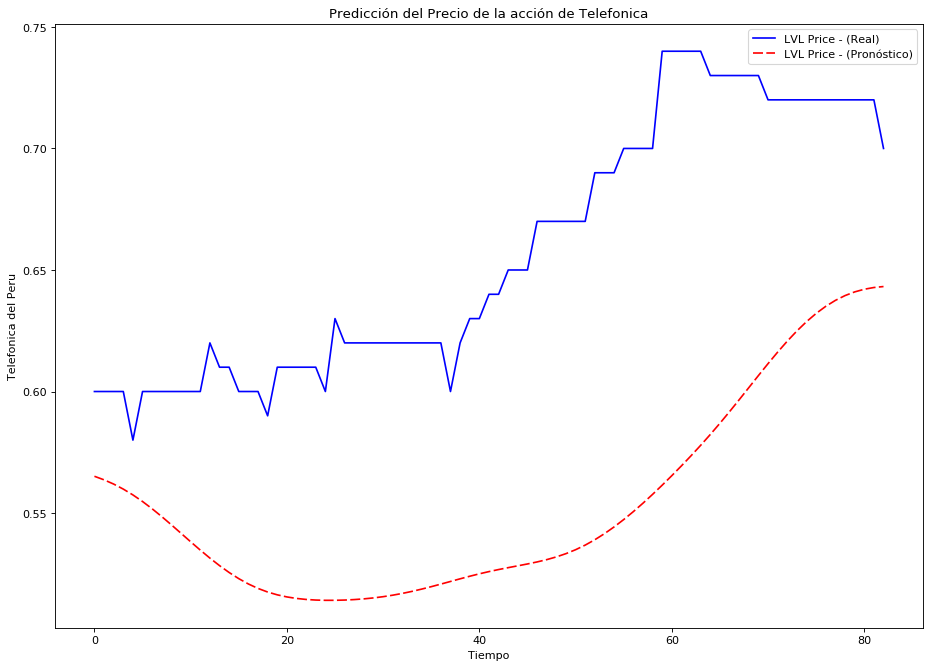

In [27]:
# Visualizando resultados
plt.figure(figsize=(14,10),dpi=80)
plt.plot(real_stock_price, color = 'blue', label = 'LVL Price - (Real)')
plt.plot(predicted_stock_price, color = 'red', label = 'LVL Price - (Pronóstico)', dashes=[6, 2])
plt.title('Predicción del Precio de la acción de Telefonica')
plt.xlabel('Tiempo')
plt.ylabel('Telefonica del Peru')
plt.legend()
plt.show()

---

 #### RMSE
 

---

In [28]:
# RMSE
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print ("rmse: ", rmse)

rmse:  0.1090205590906763
